In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from siamese_dataloader import Siamese_dataloader, Siamese_dataset_folder

In [3]:
dataset = Siamese_dataset_folder(root='../train_xml')

In [4]:
def sample_stats(idx):
    selected_record, estimateTime, mouse_record, target = dataset[idx]
    mouse_record.shape, 
    t0 = mouse_record[0, 0]
    tf = mouse_record[-1, 0]
    ret = []
    for v in mouse_record[:, 0]:
        ret.append(v-t0)
    return ret
def refresh_rate(idx):
    _, _, mouse_record, _ = dataset[idx]
    ret = []
    for i, val in enumerate(mouse_record[:,0]):
        if i+1 < len(mouse_record[:,0]):
            ret.append(mouse_record[i+1,0]-val)
    return ret
def refresh_rate_vec(idx):
    _, _, mouse_record, _ = dataset[idx]
    return (np.roll(mouse_record[:,0], -1) - mouse_record[:,0])[:-1]

In [5]:
idxs = np.random.randint(0, len(dataset), 1000000)

for i in idxs:
    print (i)
    break

988289


In [6]:
_,_,mr, _ = dataset[2]
# mr[:,0]
mr

array([[-1., -1., -1.],
       [-1., -1., -1.]])

In [7]:
import timeit
start = timeit.default_timer()
# idxs = np.random.randint(0, len(dataset), 1000000)
idxs = range(len(dataset))
frequencies_long = [refresh_rate_vec(i) for i in idxs]
stop = timeit.default_timer()
print('Time: ', stop - start)

Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D strictly increasing sequence.
Error: Expect x to be a 1D stri

In [9]:
unsqueezed = []
for e in frequencies_long:
    for val in e:
        unsqueezed.append(val)

In [10]:
unsqueezed = np.array(unsqueezed)
unsqueezed.max(), unsqueezed.min(), unsqueezed.mean(), unsqueezed.std()

(100.0, 0.0, 98.78442221878929, 10.958108813974238)

349.0 16.0 47.400851304241755 44.34781027643986


Text(0.5, 0, 'Time (ms)')

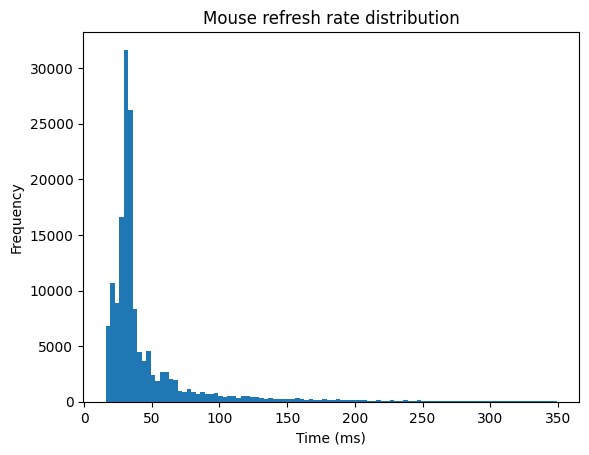

In [ ]:
unsqueezed_masked = unsqueezed[unsqueezed < 350]
unsqueezed_masked = unsqueezed_masked[unsqueezed_masked > 0 ]
print(unsqueezed_masked.max(), unsqueezed_masked.min(), unsqueezed_masked.mean(), unsqueezed_masked.std())
plt.hist(unsqueezed_masked, bins=100)
plt.title('Mouse refresh rate distribution')
plt.ylabel('Frequency')
plt.xlabel('Time (ms)')

## This justifies an interpolation at 125ms each, from 0 to 4 seconds.
We will have 8x4 timestamps for each element.


In [ ]:
_, _, mouse_record, _ = dataset[0]
mouse_record[:, 0]

array([1.64094207e+12, 1.64094207e+12, 1.64094207e+12, 1.64094207e+12,
       1.64094207e+12, 1.64094207e+12, 1.64094207e+12, 1.64094207e+12,
       1.64094207e+12, 1.64094207e+12, 1.64094207e+12, 1.64094207e+12,
       1.64094207e+12, 1.64094207e+12])

In [36]:
import conflux

In [50]:
# number of observations
n = len(mouse_record)
# time interval i.e. first and last timestamp
t0, tn = mouse_record[0, 0], mouse_record[-1, 0]

# randomly choose `n` timestamps from time interval
timestamps = np.sort(np.random.choice(np.arange(t0, tn + 1, 1), n, replace=False))
# calculate their respective observed values
observations = np.apply_along_axis(f, arr=timestamps, axis=0)

# create time series object for unevenly spaced time series
time_series = conflux.ts.IrregularTimeSeries(mouse_record[:, 1:], timestamps)

# linearly interpolate the time series starting from `t0` until `tn`
linear_interp = time_series.interpolate(interval=1, start_timestamp=t0,
                                        end_timestamp=tn, method="linear")

# interpolate time series using `most recent` strategy starting from `t0` until `tn`
most_recent_interp = time_series.interpolate(interval=1, start_timestamp=t0,
                                             end_timestamp=tn, method="most_recent")

TypeError: 'numpy.float64' object cannot be interpreted as an integer

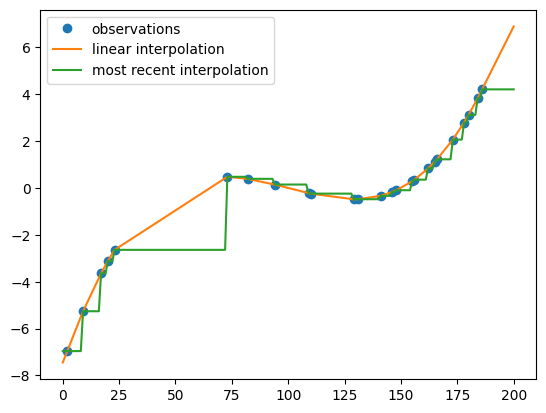

In [49]:
plt.plot(timestamps, observations, 'o', label="observations")
plt.plot(linear_interp.timestamps, linear_interp.observations, label='linear interpolation')
plt.plot(most_recent_interp.timestamps, most_recent_interp.observations, label='most recent interpolation')
plt.legend()
plt.show()

In [8]:
not_selected_indices = np.load('data/not_selected.npy')
not_selected_indices

array([      0,       3,       9, ..., 1281133, 1281146, 1281147])

In [11]:
from torchvision import datasets
imagenet_root = "/mnt/lustre/datasets/ImageNet2012"
imagenet = datasets.ImageNet(imagenet_root, split='train')

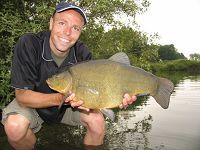

(None, (200, 150))

In [16]:
imagenet[1][0].show(), imagenet[1][0].size

In [17]:
def feature_to_pixels(x, y, width, height):
    return int(width * x), int(height * y)

def time_to_cmap(ts):
    return plt.cm.viridis((ts - ts.min()) / (ts.max() - ts.min()))

In [19]:
def one_for_all(idx):
    im, lb = imagenet[idx]
    selected_record, estimateTime, mouse_record = dataset[idx]
    mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
    fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
    cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
    plt.imshow(im)
    x,y=zip(*mouse_record_pixels)
    plt.scatter(x, y, color=cmap, alpha=0.7)
    plt.scatter(fg_x,fg_y, color='red')
    print(selected_record, estimateTime, mouse_record[0])#, itoc[lb])
    plt.show()

In [110]:
mouse_record

array([[1.64094207e+12, 8.95000000e-01, 4.93333333e-01],
       [1.64094207e+12, 8.65000000e-01, 7.13333333e-01],
       [1.64094207e+12, 7.85000000e-01, 8.53333333e-01],
       [1.64094207e+12, 7.05000000e-01, 9.80000000e-01],
       [1.64094207e+12, 6.80000000e-01, 1.00000000e+00],
       [1.64094207e+12, 6.55000000e-01, 9.80000000e-01],
       [1.64094207e+12, 6.40000000e-01, 8.60000000e-01],
       [1.64094207e+12, 6.35000000e-01, 6.73333333e-01],
       [1.64094207e+12, 6.35000000e-01, 6.66666667e-01],
       [1.64094207e+12, 6.35000000e-01, 6.46666667e-01],
       [1.64094207e+12, 6.35000000e-01, 6.40000000e-01],
       [1.64094207e+12, 6.40000000e-01, 6.26666667e-01],
       [1.64094207e+12, 6.45000000e-01, 6.13333333e-01],
       [1.64094207e+12, 6.50000000e-01, 6.13333333e-01]])

In [116]:
from scipy.interpolate import make_interp_spline

In [244]:
sec = [[j+ i/(10)for i in range(10)] for j in [0,1,2,3] ]
regular_ts = []
for el in sec:
    for v in el:
        regular_ts.append(1000*v)

regular_ts = np.array(regular_ts)
regular_ts

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
       3600., 3700., 3800., 3900.])

In [246]:
max(x//100), regular_ts[:5+2]

(5.0, array([  0., 100., 200., 300., 400., 500., 600.]))

In [257]:
DEFAULT_MOUSE_RECORD = np.array([REGULAR_TS, np.ones_like(REGULAR_TS)*-1, np.ones_like(REGULAR_TS)*-1]).T

((40, 3), (14, 3))

In [329]:
REGULAR_TS = np.array([   
        0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800., 900., 
        1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,1800., 1900., 
        2000., 2100., 2200., 2300., 2400., 2500., 2600.,2700., 2800., 2900., 
        # 3000., 3100., 3200., 3300., 3400., 3500.,3600., 3700., 3800., 3900.
        ])

DEFAULT_MOUSE_RECORD = np.array([REGULAR_TS, np.ones_like(REGULAR_TS)*-1, np.ones_like(REGULAR_TS)*-1]).T
def regularize_mouse_record(mouse_record):
        default_mouse_record = np.array([REGULAR_TS, np.ones_like(REGULAR_TS)*-1, np.ones_like(REGULAR_TS)*-1]).T
        t0 = mouse_record[0,0]
        mouse_record[:,0] = mouse_record[:,0] - t0
        tf = mouse_record[-1,0]
        idxf = min(int(tf//100) + 1, len(REGULAR_TS)-1)
        if idxf < 2:
                return default_mouse_record
        bspl = make_interp_spline(mouse_record[:,0], mouse_record[:, 1:].T, k=3,axis=1)
        default_mouse_record[:idxf, 1:] = bspl(REGULAR_TS[:idxf]).T
        return default_mouse_record

mouse_record_reg = regularize_mouse_record(mouse_record)


[[0.65       0.61333333]] tensor([570.]) [1.64094207e+12 8.95000000e-01 4.93333333e-01]


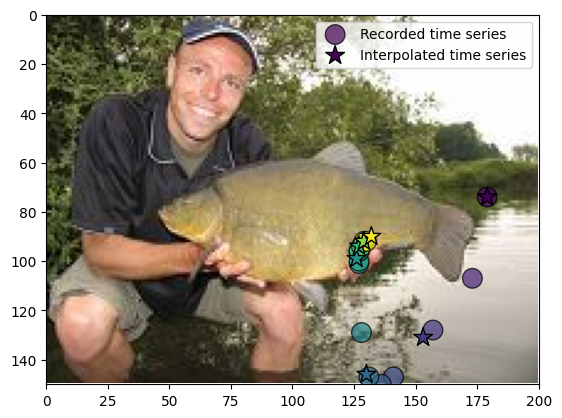

In [313]:
im, lb = imagenet[1]
selected_record, estimateTime, mouse_record,_ = dataset[0]
mouse_record_reg = regularize_mouse_record(mouse_record)
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
plt.imshow(im)
plt.xlim(0, im.width)
plt.ylim(im.height, 0)
x,y=zip(*mouse_record_pixels)
plt.scatter(x, y, color=cmap, alpha=0.7, label="Recorded time series", s=200, edgecolors='black')
mouse_record_pixels_interp = [feature_to_pixels(x,y, im.width, im.height) for t, x, y in mouse_record_reg][:7]
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record_reg[:7]]))
plt.scatter(*zip(*mouse_record_pixels_interp), color=cmap, label="Interpolated time series", marker='*', s=200, edgecolors='black')
print(selected_record, estimateTime, mouse_record[0])#, itoc[lb])
plt.legend()
plt.show()

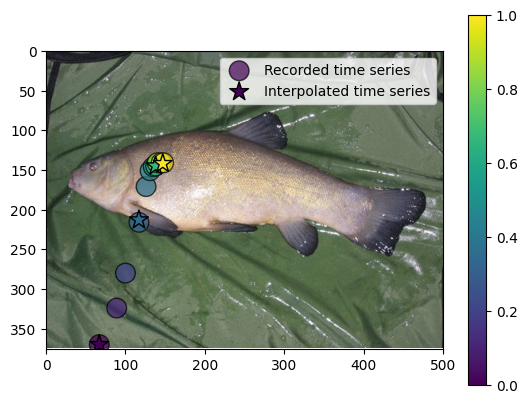

In [324]:
im, lb = imagenet[2]
selected_record, estimateTime, mouse_record,_ = dataset[1]
mouse_record_reg = regularize_mouse_record(mouse_record)
idxf = min(int(mouse_record[-1,0]//100) + 1, len(REGULAR_TS)-1)
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
plt.imshow(im)
plt.xlim(0, im.width)
plt.ylim(im.height, 0)
x,y=zip(*mouse_record_pixels)
plt.scatter(x, y, color=cmap, alpha=0.7, label="Recorded time series", s=200, edgecolors='black')
mouse_record_pixels_interp = [feature_to_pixels(x,y, im.width, im.height) for t, x, y in mouse_record_reg][:idxf]
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record_reg[:idxf]]))
plt.scatter(*zip(*mouse_record_pixels_interp), color=cmap, label="Interpolated time series", marker='*', s=200, edgecolors='black')
plt.legend()
plt.colorbar()
plt.show()

In [328]:
mouse_record

array([[ 0., -1., -1.],
       [ 0., -1., -1.]])

/tmp/ipykernel_1021138/2174379029.py:5: RuntimeWarning: invalid value encountered in divide
  return plt.cm.viridis((ts - ts.min()) / (ts.max() - ts.min()))


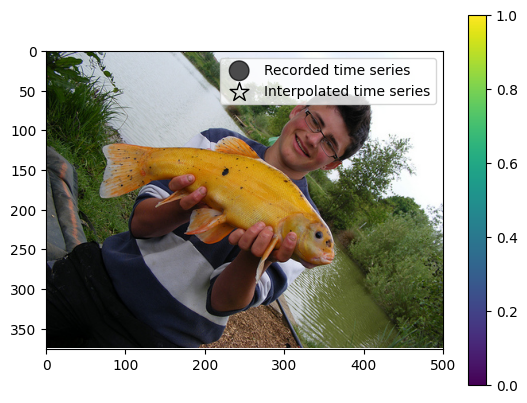

In [330]:
im, lb = imagenet[3]
selected_record, estimateTime, mouse_record,_ = dataset[2]
mouse_record_reg = regularize_mouse_record(mouse_record)
idxf = min(int(mouse_record[-1,0]//100) + 1, len(REGULAR_TS)-1)
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
plt.imshow(im)
plt.xlim(0, im.width)
plt.ylim(im.height, 0)
x,y=zip(*mouse_record_pixels)
plt.scatter(x, y, color=cmap, alpha=0.7, label="Recorded time series", s=200, edgecolors='black')
mouse_record_pixels_interp = [feature_to_pixels(x,y, im.width, im.height) for t, x, y in mouse_record_reg][:idxf]
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record_reg[:idxf]]))
plt.scatter(*zip(*mouse_record_pixels_interp), color=cmap, label="Interpolated time series", marker='*', s=200, edgecolors='black')
plt.legend()
plt.colorbar()
plt.show()

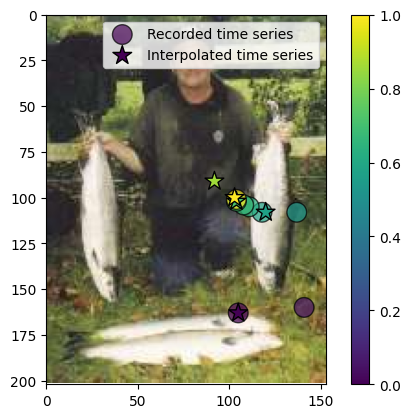

In [331]:
im, lb = imagenet[4]
selected_record, estimateTime, mouse_record,_ = dataset[3]
mouse_record_reg = regularize_mouse_record(mouse_record)
idxf = min(int(mouse_record[-1,0]//100) + 1, len(REGULAR_TS)-1)
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
plt.imshow(im)
plt.xlim(0, im.width)
plt.ylim(im.height, 0)
x,y=zip(*mouse_record_pixels)
plt.scatter(x, y, color=cmap, alpha=0.7, label="Recorded time series", s=200, edgecolors='black')
mouse_record_pixels_interp = [feature_to_pixels(x,y, im.width, im.height) for t, x, y in mouse_record_reg][:idxf]
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record_reg[:idxf]]))
plt.scatter(*zip(*mouse_record_pixels_interp), color=cmap, label="Interpolated time series", marker='*', s=200, edgecolors='black')
plt.legend()
plt.colorbar()
plt.show()

In [325]:
not_selected_indices

array([      0,       3,       9, ..., 1281133, 1281146, 1281147])

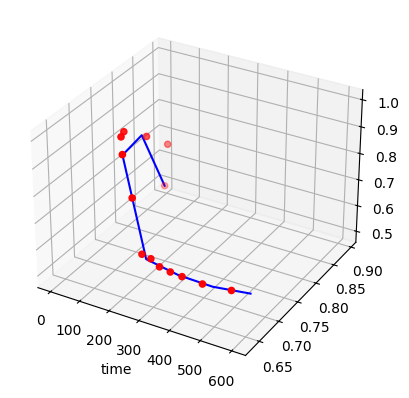

In [297]:
x = mouse_record[:,0]-mouse_record[0,0]
y = mouse_record[:,1:].T
ax = plt.axes(projection='3d')
ax.scatter3D(x, *y, color='red')
bspl = make_interp_spline(x, y, k=3,axis=1)
interpolated = bspl(regular_ts[:7])
ax.plot3D(regular_ts[:7], *interpolated, color='blue')
ax.set_xlabel('time')
plt.show()

In [223]:
interpolated

array([[0.895     , 0.76871194, 0.65452097, 0.63471608, 0.63838768,
        0.6458547 , 0.66131662],
       [0.49333333, 0.87989117, 0.97915231, 0.6603061 , 0.63117913,
        0.61346323, 0.60197591]])

[[0.65       0.61333333]] tensor([570.]) [1.64094207e+12 8.95000000e-01 4.93333333e-01]


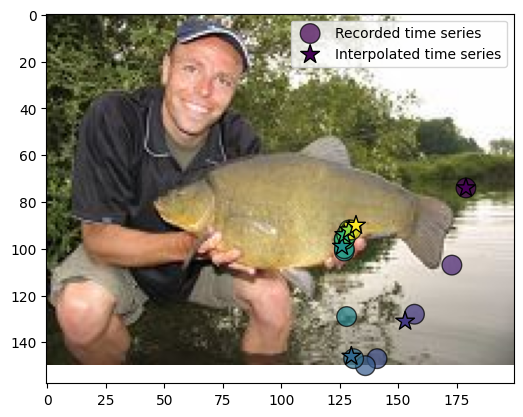

In [234]:
im, lb = imagenet[1]
selected_record, estimateTime, mouse_record,_ = dataset[0]
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
fg_x, fg_y = feature_to_pixels(selected_record[0,0], selected_record[0,1], im.width, im.height)
cmap = time_to_cmap(np.asarray([t for t, _, _ in mouse_record]))
plt.imshow(im)
x,y=zip(*mouse_record_pixels)
plt.scatter(x, y, color=cmap, alpha=0.7, label="Recorded time series", s=200, edgecolors='black')
mouse_record_pixels_interp = [feature_to_pixels(x,y, im.width, im.height) for x, y in interpolated.T]
cmap = time_to_cmap(regular_ts[:7])
plt.scatter(*zip(*mouse_record_pixels_interp), color=cmap, label="Interpolated time series", marker='*', s=200, edgecolors='black')
print(selected_record, estimateTime, mouse_record[0])#, itoc[lb])
plt.legend()
plt.show()

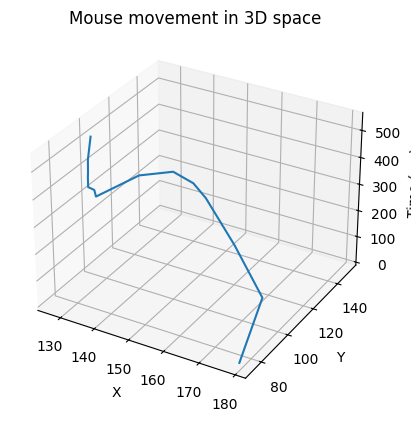

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ts = mouse_record[:, 0] - mouse_record[0, 0]
mouse_record_pixels = [feature_to_pixels(x,y, im.width, im.height) for _, x, y in mouse_record]
mouse_record_pixels = np.array(mouse_record_pixels)
img = np.array(imagenet[1][0])/255
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]

# ax.plot_surface(x, y, np.ones_like(x)*-2, rstride=1, cstride=1, facecolors=img)

ax.plot(mouse_record_pixels[:, 0], mouse_record_pixels[:, 1], ts)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Time (ms)')
ax.set_title('Mouse movement in 3D space')
# ax.plot_surface(x, y, np.ones_like(x)*-2, rstride=1, cstride=1, facecolors=np.array(imagenet[1][0])/255)

plt.show()

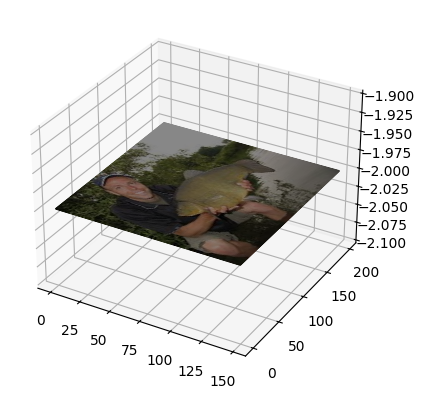

In [100]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
fn = get_sample_data("lena.png", asfileobj=False)
img = np.array(imagenet[1][0])/255
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = gca(projection='3d')
ax.plot_surface(x, y, np.ones_like(x)*-2, rstride=1, cstride=1, facecolors=np.array(imagenet[1][0])/255)
show()
